<a href="https://colab.research.google.com/github/gabrielcampanile/Neural-Network/blob/main/Projeto%205%20-%20CNN/Projeto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 5 - CNN e Comparação com MLP
## Convolutional Neural Networks (CNNs) para Classificação de Imagens

### Introdução
Neste projeto, implementaremos e compararemos o desempenho de Redes Neurais Artificiais (MLP) e Redes Neurais Convolucionais (CNNs) na tarefa de classificação de imagens utilizando o dataset CIFAR-10.

Começaremos importando as bibliotecas necessárias do TensorFlow e Keras, além de outras bibliotecas úteis como Matplotlib, Seaborn, Numpy e Pandas.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### **Passo 1. Carregamento e Pré-processamento do Dataset CIFAR-10**

A primeira etapa é carregar o dataset CIFAR-10, que consiste em 60.000 imagens coloridas 32x32 em 10 classes, com 50.000 imagens para treino e 10.000 para teste.

Realizaremos o pré-processamento dos dados:
1. Normalizaremos os valores dos pixels para o intervalo [0, 1] dividindo por 255.0.
2. Converteremos os rótulos das classes para o formato one-hot encoding, necessário para o treinamento com a função de perda `categorical_crossentropy`.

Também definiremos o formato da entrada (`input_shape`) e os nomes das classes para facilitar a interpretação dos resultados.

In [4]:
print("Carregando e preparando o dataset CIFAR-10...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converter os rótulos para o formato one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

input_shape = x_train.shape[1:]
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

print("Dataset pronto.")
print(f"Formato dos dados de treino: {x_train.shape}")
print(f"Formato dos rótulos de treino: {y_train.shape}")


Carregando e preparando o dataset CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset pronto.
Formato dos dados de treino: (50000, 32, 32, 3)
Formato dos rótulos de treino: (50000, 10)


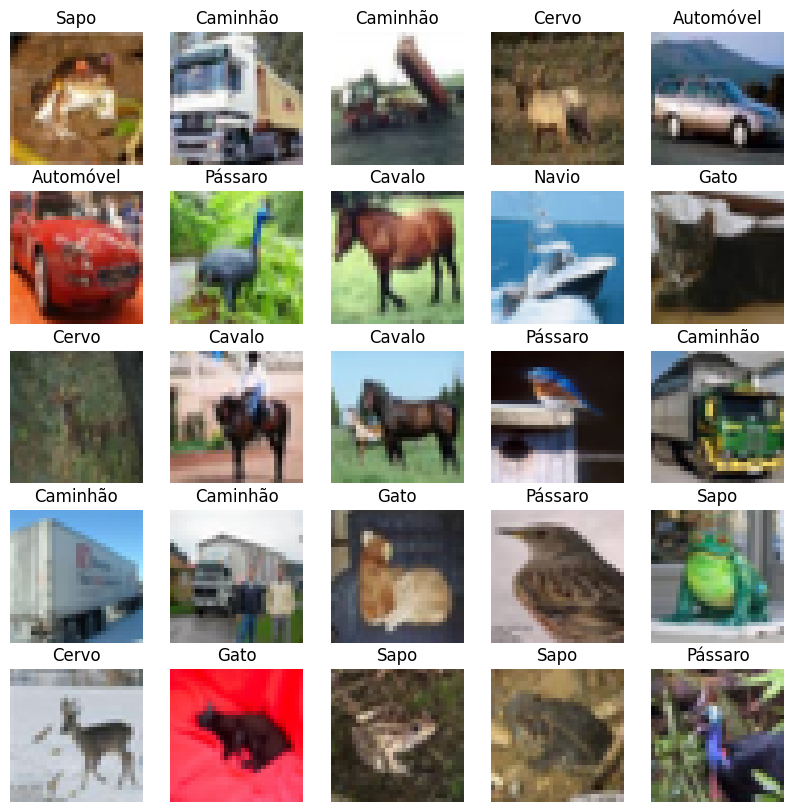

In [6]:
# Visualizar algumas imagens do dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    # Obter o índice da classe a partir do one-hot encoding
    class_index = np.argmax(y_train[i])
    plt.title(class_names[class_index])
    plt.axis('off')
plt.show()

### **Passo 2. Implementação da MLP (Baseline)**

Implementaremos uma Rede Neural Multilayer Perceptron (MLP) simples como linha de base (baseline) para comparação.

A MLP terá camadas densas (fully connected) e utilizará a função de ativação ReLU nas camadas ocultas e Softmax na camada de saída para classificação multiclasse. O modelo será compilado com o otimizador Adam e a função de perda `categorical_crossentropy`.

Em seguida, treinaremos o modelo MLP nos dados de treino e avaliaremos seu desempenho nos dados de teste.

In [ ]:
def criar_modelo_mlp(input_shape, num_classes):
    """Cria um modelo MLP similar ao do projeto anterior."""
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

print("\n--- Treinando o Modelo MLP (Baseline) ---")
model_mlp = criar_modelo_mlp(input_shape, num_classes)
model_mlp.summary()
history_mlp = model_mlp.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1, verbose=2)
score_mlp = model_mlp.evaluate(x_test, y_test, verbose=0)
params_mlp = model_mlp.count_params()



--- Treinando o Modelo MLP (Baseline) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
704/704 - 6s - 9ms/step - accuracy: 0.3269 - loss: 1.8878 - val_accuracy: 0.3242 - val_loss: 1.9040
Epoch 2/15
704/704 - 7s - 10ms/step - accuracy: 0.3941 - loss: 1.6892 - val_accuracy: 0.4182 - val_loss: 1.6346
Epoch 3/15
704/704 - 3s - 4ms/step - accuracy: 0.4234 - loss: 1.6047 - val_accuracy: 0.4422 - val_loss: 1.5612
Epoch 4/15
704/704 - 4s - 6ms/step - accuracy: 0.4468 - loss: 1.5385 - val_accuracy: 0.4446 - val_loss: 1.5217
Epoch 5/15
704/704 - 3s - 4ms/step - accuracy: 0.4631 - loss: 1.5043 - val_accuracy: 0.4332 - val_loss: 1.5508
Epoch 6/15
704/704 - 2s - 3ms/step - accuracy: 0.4708 - loss: 1.4725 - val_accuracy: 0.4758 - val_loss: 1.4697
Epoch 7/15
704/704 - 3s - 5ms/step - accuracy: 0.4849 - loss: 1.4423 - val_accuracy: 0.4642 - val_loss: 1.5154
Epoch 8/15
704/704 - 2s - 3ms/step - accuracy: 0.4926 - loss: 1.4225 - val_accuracy: 0.4498 - val_loss: 1.5203
Epoch 9/15
704/704 - 2s - 3ms/step - accuracy: 0.4998 - loss: 1.3993 - val_accuracy: 0.4920 - val_loss: 1.4499


### **Passo 3. Implementação e Avaliação de Topologias de CNN**

Agora, vamos implementar e avaliar diferentes topologias de Redes Neurais Convolucionais (CNNs). Definiremos 6 funções que retornam modelos Sequential com diferentes arquiteturas, variando a profundidade (número de camadas convolucionais/pooling), largura (número de filtros) e a inclusão de técnicas de regularização como Dropout e Batch Normalization.

Cada modelo CNN será compilado da mesma forma que a MLP (Adam optimizer, categorical_crossentropy loss) e treinado nos dados de treino. Após o treino, avaliaremos o desempenho de cada topologia no conjunto de teste e armazenaremos os resultados.

In [ ]:
def criar_modelo_cnn(topology_fn, input_shape, num_classes):
    """Função genérica para criar e compilar modelos CNN."""
    model = topology_fn(input_shape, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Definindo as 6 topologias de CNN para experimentação
def topologia_1_base():
    return Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

def topologia_2_mais_profunda():
    return Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

def topologia_3_mais_larga():
    return Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

def topologia_4_com_dropout():
    return Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

def topologia_5_com_batchnorm():
    return Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

def topologia_6_profunda_e_larga():
    return Sequential([
        Conv2D(64, (3, 3), padding='same', input_shape=input_shape),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

topologias = {
    "CNN 1: Base Simples": topologia_1_base,
    "CNN 2: Mais Profunda": topologia_2_mais_profunda,
    "CNN 3: Mais Larga": topologia_3_mais_larga,
    "CNN 4: Com Dropout": topologia_4_com_dropout,
    "CNN 5: Com Batch Norm": topologia_5_com_batchnorm,
    "CNN 6: Profunda e Larga": topologia_6_profunda_e_larga,
}

resultados_cnn = {}

for nome, funcao_topologia in topologias.items():
    print(f"\n--- Treinando {nome} ---")
    model = funcao_topologia()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1, verbose=0)
    score = model.evaluate(x_test, y_test, verbose=0)

    resultados_cnn[nome] = {
        "model": model,
        "history": history,
        "acuracia": score[1],
        "perda": score[0],
        "parametros": model.count_params()
    }
    print(f"Resultado de {nome} - Acurácia: {score[1]:.4f}, Perda: {score[0]:.4f}")



--- Treinando CNN 1: Base Simples ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Resultado de CNN 1: Base Simples - Acurácia: 0.6449, Perda: 1.1064

--- Treinando CNN 2: Mais Profunda ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Resultado de CNN 2: Mais Profunda - Acurácia: 0.7007, Perda: 1.2550

--- Treinando CNN 3: Mais Larga ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Resultado de CNN 3: Mais Larga - Acurácia: 0.6942, Perda: 1.5085

--- Treinando CNN 4: Com Dropout ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,070,794 (4.08 MB)

 Trainable params: 1,070,794 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Resultado de CNN 4: Com Dropout - Acurácia: 0.7245, Perda: 0.7883

--- Treinando CNN 5: Com Batch Norm ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,482 (2.08 MB)

 Trainable params: 545,290 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

Resultado de CNN 5: Com Batch Norm - Acurácia: 0.6680, Perda: 1.2527

--- Treinando CNN 6: Profunda e Larga ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,360,906 (9.01 MB)

 Trainable params: 2,360,522 (9.00 MB)

 Non-trainable params: 384 (1.50 KB)

Resultado de CNN 6: Profunda e Larga - Acurácia: 0.7845, Perda: 0.6545


### **Passo 4. Análise dos Resultados e Matriz de Confusão**

Com os resultados de todas as topologias CNN em mãos, realizaremos uma análise comparativa.

Primeiro, rankearemos as topologias CNN com base na acurácia alcançada no conjunto de teste.

Em seguida, para os dois modelos CNN com melhor desempenho, geraremos e exibiremos suas matrizes de confusão. A matriz de confusão nos ajudará a entender visualmente o desempenho de cada classe e identificar quais classes os modelos têm dificuldade em distinguir.


--- Ranking das Topologias CNN ---
CNN 6: Profunda e Larga: Acurácia = 0.7845 | Parâmetros = 2,360,906
CNN 4: Com Dropout: Acurácia = 0.7245 | Parâmetros = 1,070,794
CNN 2: Mais Profunda: Acurácia = 0.7007 | Parâmetros = 545,098
CNN 3: Mais Larga: Acurácia = 0.6942 | Parâmetros = 1,125,642
CNN 5: Com Batch Norm: Acurácia = 0.6680 | Parâmetros = 545,482
CNN 1: Base Simples: Acurácia = 0.6449 | Parâmetros = 1,050,890

Gerando Matriz de Confusão para os 2 melhores modelos...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


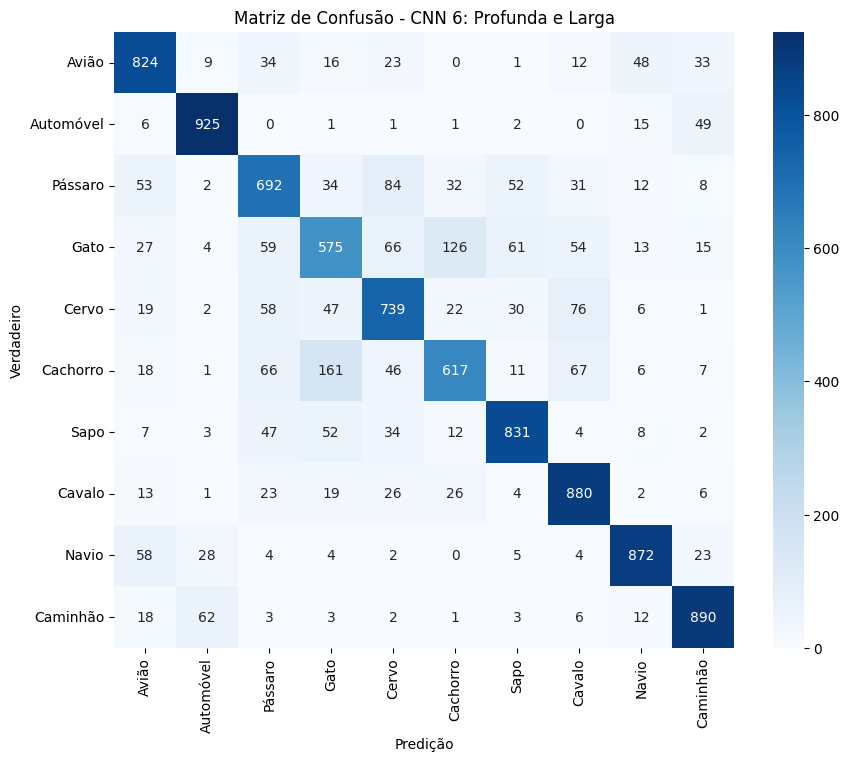

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


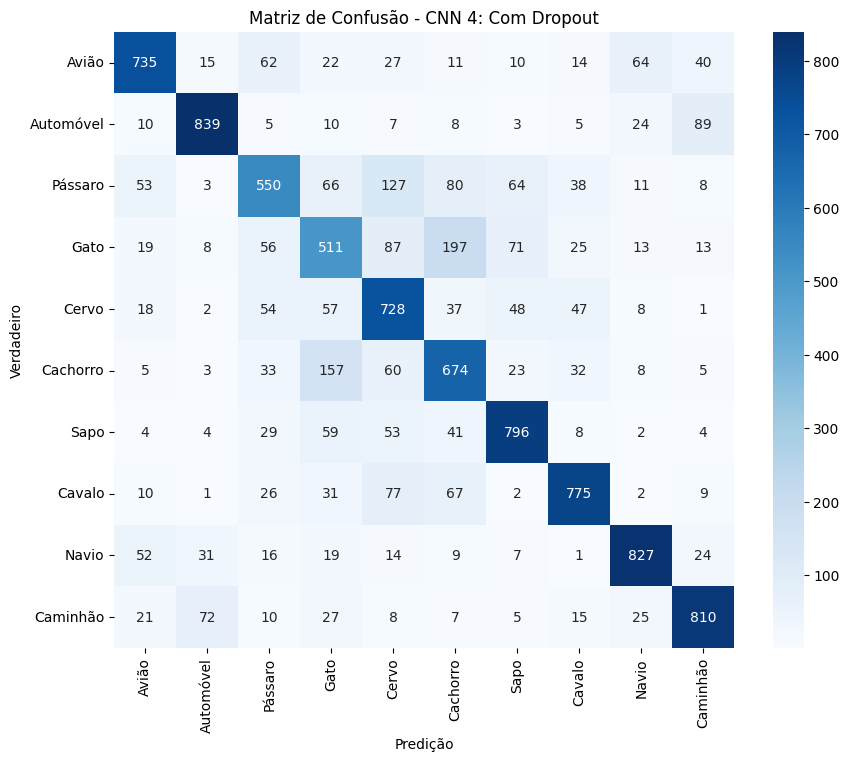

In [ ]:
# Ordena os resultados pela acurácia
resultados_ordenados = sorted(resultados_cnn.items(), key=lambda item: item[1]['acuracia'], reverse=True)

print("\n--- Ranking das Topologias CNN ---")
for nome, res in resultados_ordenados:
    print(f"{nome}: Acurácia = {res['acuracia']:.4f} | Parâmetros = {res['parametros']:,}")

# Seleciona os dois melhores modelos
melhor_modelo_1_nome, melhor_modelo_1_res = resultados_ordenados[0]
melhor_modelo_2_nome, melhor_modelo_2_res = resultados_ordenados[1]

def plotar_matriz_confusao(model, nome_modelo):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx,
                xticklabels=class_names,
                yticklabels=class_names,
                annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predição')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

print("\nGerando Matriz de Confusão para os 2 melhores modelos...")
plotar_matriz_confusao(melhor_modelo_1_res['model'], melhor_modelo_1_nome)
plotar_matriz_confusao(melhor_modelo_2_res['model'], melhor_modelo_2_nome)


### **Passo 5. Comparação Final: MLP vs. Melhor CNN**

Finalmente, apresentaremos uma comparação direta entre o modelo MLP baseline e os dois melhores modelos CNN.

Esta comparação focará na acurácia no conjunto de teste e no número de parâmetros treináveis de cada modelo, destacando a eficiência e a efetividade das CNNs para tarefas de classificação de imagens em comparação com as MLPs.

In [ ]:
print("\n" + "="*50)
print("COMPARAÇÃO FINAL: MLP vs. MELHORES CNN")
print("="*50)

dados_comparacao = {
    "Modelo": ["MLP (Baseline)", melhor_modelo_1_nome, melhor_modelo_2_nome],
    "Acurácia no Teste": [f"{score_mlp[1]:.4f}", f"{melhor_modelo_1_res['acuracia']:.4f}", f"{melhor_modelo_2_res['acuracia']:.4f}"],
    "Nº de Parâmetros": [f"{params_mlp:,}", f"{melhor_modelo_1_res['parametros']:,}", f"{melhor_modelo_2_res['parametros']:,}"]
}

df_comparacao = pd.DataFrame(dados_comparacao)
print(df_comparacao.to_string(index=False))



COMPARAÇÃO FINAL: MLP vs. MELHORES CNN
                 Modelo Acurácia no Teste Nº de Parâmetros
         MLP (Baseline)            0.5017        1,707,274
CNN 6: Profunda e Larga            0.7845        2,360,906
     CNN 4: Com Dropout            0.7245        1,070,794


### **Resultados**

#### **1. Análise das Topologias CNN**

Observando o ranking, vemos uma clara evolução de desempenho à medida que a arquitetura se torna mais complexa e utiliza técnicas de regularização:

* **Efeito da Profundidade:** O "CNN 2: Mais Profunda" (70.1% de acurácia com 545k parâmetros) superou a "CNN 1: Base Simples" (64.5%). Isso indica que adicionar uma segunda camada convolucional permitiu ao modelo aprender características mais complexas e hierárquicas, melhorando o desempenho.

* **Efeito da Largura vs. Profundidade:** Comparando a "CNN 2: Mais Profunda" (70.1% de acurácia, 545k parâmetros) com a "CNN 3: Mais Larga" (69.4% de acurácia, 1.1M de parâmetros), notamos que aprofundar a rede foi mais eficiente em termos de parâmetros do que alargá-la para um ganho de performance similar.

* **Efeito da Regularização:**
    * **Dropout:** O "CNN 4: Com Dropout" (72.5%) melhorou significativamente em relação ao seu equivalente sem dropout (CNN 2, com 70.1%). Isso mostra que o Dropout foi eficaz em combater o overfitting, ajudando o modelo a generalizar melhor para os dados de teste.
    * **Batch Normalization:** Curiosamente, o "CNN 5: Com Batch Norm" (66.8%) teve um desempenho inferior ao seu equivalente sem a técnica (CNN 2, com 70.1%). Embora a Batch Normalization geralmente acelere e estabilize o treino, nesta configuração específica ela não resultou em uma melhor acurácia final, o que pode acontecer em alguns casos.
    * **Combinação Vencedora:** O "CNN 6: Profunda e Larga" foi o grande campeão (78.5%). Este modelo combinou tudo: maior profundidade, maior largura e técnicas de regularização (Dropout e Batch Norm). Isso demonstra que o aumento da capacidade do modelo (mais camadas e filtros), quando combinado com técnicas robustas de regularização, levou ao melhor desempenho geral, mesmo que ao custo de um número maior de parâmetros.

#### **2. Avaliação dos 2 Melhores Modelos (CNN 6 vs. CNN 4)**

* **CNN 6 (Profunda e Larga):** Acurácia = **78.45%** | Parâmetros = **2,360,906**
* **CNN 4 (Com Dropout):** Acurácia = **72.45%** | Parâmetros = **1,070,794**

A análise aqui revela um clássico **trade-off entre performance e custo computacional**.
* O **Modelo 6** é o campeão indiscutível em acurácia, superando o segundo colocado em 6 pontos percentuais, o que é uma margem muito significativa.
* No entanto, essa performance superior tem um custo: ele possui mais do que o **dobro de parâmetros** que o Modelo 4. Isso significa que o Modelo 6 é mais pesado, consome mais memória e é mais lento para treinar e para fazer predições.

**Conclusão:** A escolha entre os dois dependeria da aplicação. Para um sistema onde a máxima acurácia é crítica (ex: um diagnóstico médico), o Modelo 6 seria o escolhido. Para uma aplicação em um dispositivo móvel ou onde a velocidade de resposta é mais importante, o Modelo 4 oferece um excelente equilíbrio, entregando uma performance robusta com um custo computacional muito menor.

#### **3. Comparação Final: MLP vs. CNN**

1.  **Eficiência (Acurácia por Parâmetro):** Vamos comparar a MLP com uma CNN de complexidade mais próxima ou menor. A **CNN 4 (Com Dropout)** alcançou **72.45% de acurácia** com apenas **1.07M de parâmetros**. Em contraste, a MLP precisou de **1.7M de parâmetros** para atingir uma acurácia muito inferior, de **50.17%**.
    * **Conclusão Direta:** Com ~600.000 parâmetros a menos, a CNN entregou um resultado ~22 pontos percentuais superior. Isso prova a imensa eficiência da arquitetura convolucional.

2.  **Efetividade (Potencial de Performance):** A MLP, por ser totalmente conectada, trata a imagem como um vetor de pixels sem relação espacial. Ela não possui o "viés indutivo" para entender que pixels próximos formam estruturas. Por isso, seu teto de performance é baixo para tarefas de imagem. A CNN, mesmo a mais simples, já supera a MLP. A **CNN 6** atinge um patamar de acurácia (78.5%) que seria praticamente inalcançável para uma MLP, independentemente de quantos parâmetros adicionássemos a ela, pois são ferramentas fundamentalmente diferentes.

**Análise Final:**

A superioridade da CNN sobre a MLP para tarefas de imagem não reside apenas em ter menos parâmetros, mas sim em sua **eficiência e efetividade arquitetural**. Os resultados deste projeto demonstram que uma CNN de tamanho moderado (**CNN 4**) supera drasticamente uma MLP maior e com mais parâmetros, provando sua eficiência. Além disso, ao aumentar a complexidade da CNN de forma inteligente (**CNN 6**), é possível atingir um nível de acurácia que está fora do alcance da abordagem MLP. A CNN é a ferramenta correta para o trabalho pois sua arquitetura com camadas convolucionais e *parameter sharing* foi projetada especificamente para aprender as características espaciais hierárquicas que definem uma imagem.